# Classification of Quantum Wave Functions

| Category          |  System          | Wave Function Type     | Mathematical Representation        | Applications |
|----------------|:----------------:|:----------------------:|:-------------------------------------:|-------------:|
|**Bound States**|Particle in a Box | Standing wave solutions| $( \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) )$  | Quantum wells, nanostructures |
|                |Harmonic Oscillator| Position-space wave function | $( \psi_n(x) = N_n H_n(x) e^{-m\omega x^2 / 2\hbar} )$| Vibrational states in molecules |
|                |Harmonic Oscillator| Momentum-space wave function|$ \phi_n(p) = M_n H_n(p) e^{-p^2 / 2m\hbar\omega} $|Quantum optics, Fourier analysis |
|                |Harmonic Oscillator| Coherent states (minimum uncertainty)|$ \psi_\alpha(x) = e^{-(x-x_0)^2/2\sigma^2} e^{i p_0 x / \hbar}$|Laser physics, quantum optics|
|                | Finite Potential Well| Sinusoidal inside, exponential outside|$\psi(x) = A\sin(kx), B e^{-\kappa x} $| Semiconductor devices, quantum dots|
|                | Hydrogen Atom| Radial × Spherical harmonics| $ \psi_{n,l,m} = R_{n,l}(r) Y_l^m(\theta, \phi) $| Atomic physics, spectroscopy |
|                | Landau Levels| Harmonic oscillator in a magnetic field| $ \psi_n(x, y) = H_n(x) e^{-(x^2 + y^2)/2} $| Quantum Hall effect, topological materials |
|**Free & Scattering**|Free Particle|Plane wave solution (position space)|$\psi(x) = A e^{ikx}$|Electron transport, wave mechanics|
|                | Free Particle|Momentum-space wave function|$\phi(p) = \delta(p - p_0)$|Scattering theory, QFT|
|                | Free Particle|Gaussian Wave Packet (localized wave)|$\psi(x) = \left( \frac{1}{\sqrt{2\pi\sigma_x^2}} \right)^{\frac{1}{4}} e^{-\frac{(x - x_0)^2}{4\sigma_x^2}} e^{i k_0 x}$| Wave packet dynamics, signal processing|
|                |Step Potential|Plane waves with different wave numbers|$ \psi(x) = Ae^{ik_1 x} + Be^{-ik_1 x}, x < 0 $|Quantum tunneling, reflection|
|                |Delta Potential|Scattering solutions (transmission/reflection)|$\psi(x) = e^{ikx} + r e^{-ikx}, x<0$|Quantum dots, defect states|
|                |Momentum-Space Waves|Fourier transforms of wave functions|$\psi(p) = \int \psi(x) e^{-ipx/\hbar} dx $|Scattering theory, quantum field theory|
|**Advanced/Special**|Bloch Wave Functions|Electrons in periodic potentials|$ \psi_k(x) = u_k(x) e^{ikx} $|Solid-state physics, band structures|
|**Relativistic/QFT**|Dirac Spinors|Solutions to Dirac equation|$ \psi(x) = u(p) e^{-ipx/\hbar}$|Relativistic quantum mechanics, spin-½ particles|


| Category          |  System          | Wave Function Type     | Mathematical Representation        | Applications |
|----------------|:----------------:|:----------------------:|:-------------------------------------:|-------------:|
|**Bound States**|Particle in a Box | Standing wave solutions| $( \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) )$  | Quantum wells, nanostructures |
|                |Harmonic Oscillator| Position-space wave function | $( \psi_n(x) = N_n H_n(x) e^{-m\omega x^2 / 2\hbar} )$| Vibrational states in molecules |
|                |Harmonic Oscillator| Momentum-space wave function|$ \phi_n(p) = M_n H_n(p) e^{-p^2 / 2m\hbar\omega} $|Quantum optics, Fourier analysis |
|                |Harmonic Oscillator| Coherent states (minimum uncertainty)|$ \psi_\alpha(x) = e^{-(x-x_0)^2/2\sigma^2} e^{i p_0 x / \hbar}$|Laser physics, quantum optics|
|                | Finite Potential Well| Sinusoidal inside, exponential outside|$\psi(x) = A\sin(kx), B e^{-\kappa x} $| Semiconductor devices, quantum dots|
|                | Hydrogen Atom| Radial × Spherical harmonics| $ \psi_{n,l,m} = R_{n,l}(r) Y_l^m(\theta, \phi) $| Atomic physics, spectroscopy |
|                | Landau Levels| Harmonic oscillator in a magnetic field| $ \psi_n(x, y) = H_n(x) e^{-(x^2 + y^2)/2} $| Quantum Hall effect, topological materials |
|**Free & Scattering**|Free Particle|Plane wave solution (position space)|$\psi(x) = A e^{ikx}$|Electron transport, wave mechanics|
|                | Free Particle|Momentum-space wave function|$\phi(p) = \delta(p - p_0)$|Scattering theory, QFT|
|                | Free Particle|Gaussian Wave Packet (localized wave)|$\psi(x) = \left( \frac{1}{\sqrt{2\pi\sigma_x^2}} \right)^{\frac{1}{4}} e^{-\frac{(x - x_0)^2}{4\sigma_x^2}} e^{i k_0 x}$| Wave packet dynamics, signal processing|
|                |Step Potential|Plane waves with different wave numbers|$ \psi(x) = Ae^{ik_1 x} + Be^{-ik_1 x}, x < 0 $|Quantum tunneling, reflection|
|                |Delta Potential|Exponential decay (bound state)|$\psi(x)=Ce^-\kappa|x|$|Artificial atoms, impurity states|



|                |Delta Potential|Scattering solutions (transmission/reflection)|$\psi(x) = e^{ikx} + r e^{-ikx}, x<0$|Quantum dots, defect states|
|                |Momentum-Space Waves|Fourier transforms of wave functions|$\psi(p) = \int \psi(x) e^{-ipx/\hbar} dx $|Scattering theory, quantum field theory|
|**Advanced/Special**|Bloch Wave Functions|Electrons in periodic potentials|$ \psi_k(x) = u_k(x) e^{ikx} $|Solid-state physics, band structures|
|                |Entangled States|Bell states (non-separable wave function)|$|\psi\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$|Quantum computing, teleportation|
|**Relativistic/QFT**|Dirac Spinors|Solutions to Dirac equation|$ \psi(x) = u(p) e^{-ipx/\hbar}$|Relativistic quantum mechanics, spin-½ particles|
|                |Klein-Gordon Equation|Solutions to Klein-Gordon equation|$\psi(x) = e^{-iEt/\hbar}$|Scalar field theory, spin-0 particles|
|                |Fock Space Waves|Many-particle quantum states|$ |n_1, n_2, ...\rangle $|Quantum field theory, particle physics|



---

# Visualizing a Gaussian Wave Packet in Position and Momentum Space

This project simulates and visualizes wavefunctions $\psi(x)$ in position space and $\psi(p)$ in momentum space for a Gaussian wave packet. The code uses Fourier transforms to switch between the two spaces and demonstrates key concepts in continuous-variable quantum mechanics.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
# Constants
hbar = 1.0  # reduced Plancks constant
m = 1.0  # mass
omega = 1.0  # angular frequency

# Constants

### Reduced Planck's constant ($\hbar$):
```python
hbar = 1.0
```
$\hbar = \frac{h}{2\pi}$, where $h$ is Planck's constant.
It is set to 1.0 for simplicity, which is common in computational physics to work in natural units. The actual value of $\hbar$ is $1.054 \times 10^{-34} \ \mathrm{J \cdot s}$.

### Mass ($m$):
```python
m = 1.0
```
Represents the mass of the particle being simulated.
Set to 1.0 to simplify calculations and focus on the qualitative behavior of the wavefunction.

### Angular frequency ($\omega$):
```python
omega = 1.0
```
Represents the angular frequency of the system (for a harmonic oscillator).
Determines how quickly the particle oscillates.

# Grid Settings

### Position space grid range ($x_{\text{min}}, x_{\text{max}}$):

In [55]:
x_min, x_max = -10, 10

Defines the range of the position grid, i.e., the simulation domain.
The particle is assumed to exist within $x \in [-10, 10]$.

### Number of grid points ($N$):

In [56]:
N = 1024

Specifies the number of discrete points used to sample the position space.
A higher $N$ provides better resolution for the wavefunction, but increases computational cost.

### Creating the position grid ($x$)

In [57]:
x = np.linspace(x_min, x_max, N)

Generates $N$ evenly spaced points between $x_{\text{min}}$ and $x_{\text{max}}$, forming the position space grid.

In [58]:
dx = x[1] - x[0]

Calculates the spacing between consecutive grid points. Necessary for performing numerical operations like integration differentiation and Fourier transforms


### Defining Wavefunction in Position Space
#### Gaussian Wave Packet:

In [59]:
x0 = 0.0  
p0 = 1.0  
sigma = 1.0  

psi_x = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * p0 * x / hbar)

The Gaussian wave packet is defined with:
- $x_0$: Center of the wave packet in position space.
- $p_0$: Mean momentum.
- $\sigma$: Width of the wave packet.

###  Normalizing the Wavefunction

In [60]:
norm_x = np.sqrt(np.sum(np.abs(psi_x)**2) * dx)
psi_x /= norm_x

### Computing Wavefunction in Momentum Space

In [61]:
dp = 2 * np.pi / (N * dx)  # momentum space grid spacing
p = np.fft.fftfreq(N, d=dx) * 2 * np.pi
psi_p = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(psi_x))) * dx / (2 * np.pi / hbar)

- `np.fft.fftfreq`: Creates the momentum grid
- `np.fft.fft` and `np.fft.fftshift`: Perform the Fourier transform and shift the zero-frequency component to the center

### Normalizing the Wavefunction in Momentum Space

In [62]:
norm_p = np.sqrt(np.sum(np.abs(psi_p)**2) * dp)
psi_p /= norm_p

###  Visualization



In [63]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### Position space

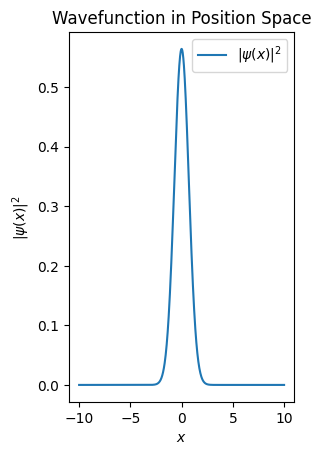

In [64]:
plt.subplot(1, 2, 1)
plt.plot(x, np.abs(psi_x)**2, label='$|\psi(x)|^2$')
plt.title('Wavefunction in Position Space')
plt.xlabel('$x$')
plt.ylabel('$|\psi(x)|^2$')
plt.legend()

### Momentum space

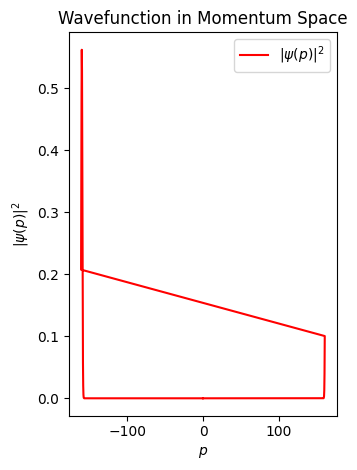

In [65]:
plt.subplot(1, 2, 2)
plt.plot(p, np.abs(psi_p)**2, label='$|\psi(p)|^2$', color='r')
plt.title('Wavefunction in Momentum Space')
plt.xlabel('$p$')
plt.ylabel('$|\psi(p)|^2$')
plt.legend()

plt.tight_layout()
plt.show()

 two plots:
1. $|\psi(x)|^2$: Probability density in position space.
2. $|\psi(p)|^2$: Probability density in momentum space.


| Category          |  System          | Wave Function Type     | Mathematical Representation        | Applications |
|----------------|:----------------:|:----------------------:|:-------------------------------------:|-------------:|
|**Bound States**|Particle in a Box | Standing wave solutions| $( \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right) )$  | Quantum wells, nanostructures |
|                |Harmonic Oscillator| Position-space wave function | $( \psi_n(x) = N_n H_n(x) e^{-m\omega x^2 / 2\hbar} )$| Vibrational states in molecules |
|                |Harmonic Oscillator| Momentum-space wave function|$ \phi_n(p) = M_n H_n(p) e^{-p^2 / 2m\hbar\omega} $|Quantum optics, Fourier analysis |
|                |Harmonic Oscillator| Coherent states (minimum uncertainty)|$ \psi_\alpha(x) = e^{-(x-x_0)^2/2\sigma^2} e^{i p_0 x / \hbar}$|Laser physics, quantum optics|
|                | Finite Potential Well| Sinusoidal inside, exponential outside|$\psi(x) = A\sin(kx), B e^{-\kappa x} $| Semiconductor devices, quantum dots|
|                | Hydrogen Atom| Radial × Spherical harmonics| $ \psi_{n,l,m} = R_{n,l}(r) Y_l^m(\theta, \phi) $| Atomic physics, spectroscopy |
|                | Landau Levels| Harmonic oscillator in a magnetic field| $ \psi_n(x, y) = H_n(x) e^{-(x^2 + y^2)/2} $| Quantum Hall effect, topological materials |
|**Free & Scattering**|Free Particle|Plane wave solution (position space)|$\psi(x) = A e^{ikx}$|Electron transport, wave mechanics|
|                | Free Particle|Momentum-space wave function|$\phi(p) = \delta(p - p_0)$|Scattering theory, QFT|
|                | Free Particle|Gaussian Wave Packet (localized wave)|$\psi(x) = \left( \frac{1}{\sqrt{2\pi\sigma_x^2}} \right)^{\frac{1}{4}} e^{-\frac{(x - x_0)^2}{4\sigma_x^2}} e^{i k_0 x}$| Wave packet dynamics, signal processing|
|                |Step Potential|Plane waves with different wave numbers|$ \psi(x) = Ae^{ik_1 x} + Be^{-ik_1 x}, x < 0 $|Quantum tunneling, reflection|
|                |Delta Potential|Exponential decay (bound state)| $ \psi(x) = C e^{-\kappa |x|} $| Artificial atoms, impurity states|



|                |Delta Potential|Scattering solutions (transmission/reflection)|$\psi(x) = e^{ikx} + r e^{-ikx}, x<0$|Quantum dots, defect states|
|                |Momentum-Space Waves|Fourier transforms of wave functions|$\psi(p) = \int \psi(x) e^{-ipx/\hbar} dx $|Scattering theory, quantum field theory|
|**Advanced/Special**|Bloch Wave Functions|Electrons in periodic potentials|$ \psi_k(x) = u_k(x) e^{ikx} $|Solid-state physics, band structures|
|                |Entangled States|Bell states (non-separable wave function)|$|\psi\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$|Quantum computing, teleportation|
|**Relativistic/QFT**|Dirac Spinors|Solutions to Dirac equation|$ \psi(x) = u(p) e^{-ipx/\hbar}$|Relativistic quantum mechanics, spin-½ particles|
|                |Klein-Gordon Equation|Solutions to Klein-Gordon equation|$\psi(x) = e^{-iEt/\hbar}$|Scalar field theory, spin-0 particles|
|                |Fock Space Waves|Many-particle quantum states|$ |n_1, n_2, ...\rangle $|Quantum field theory, particle physics|
